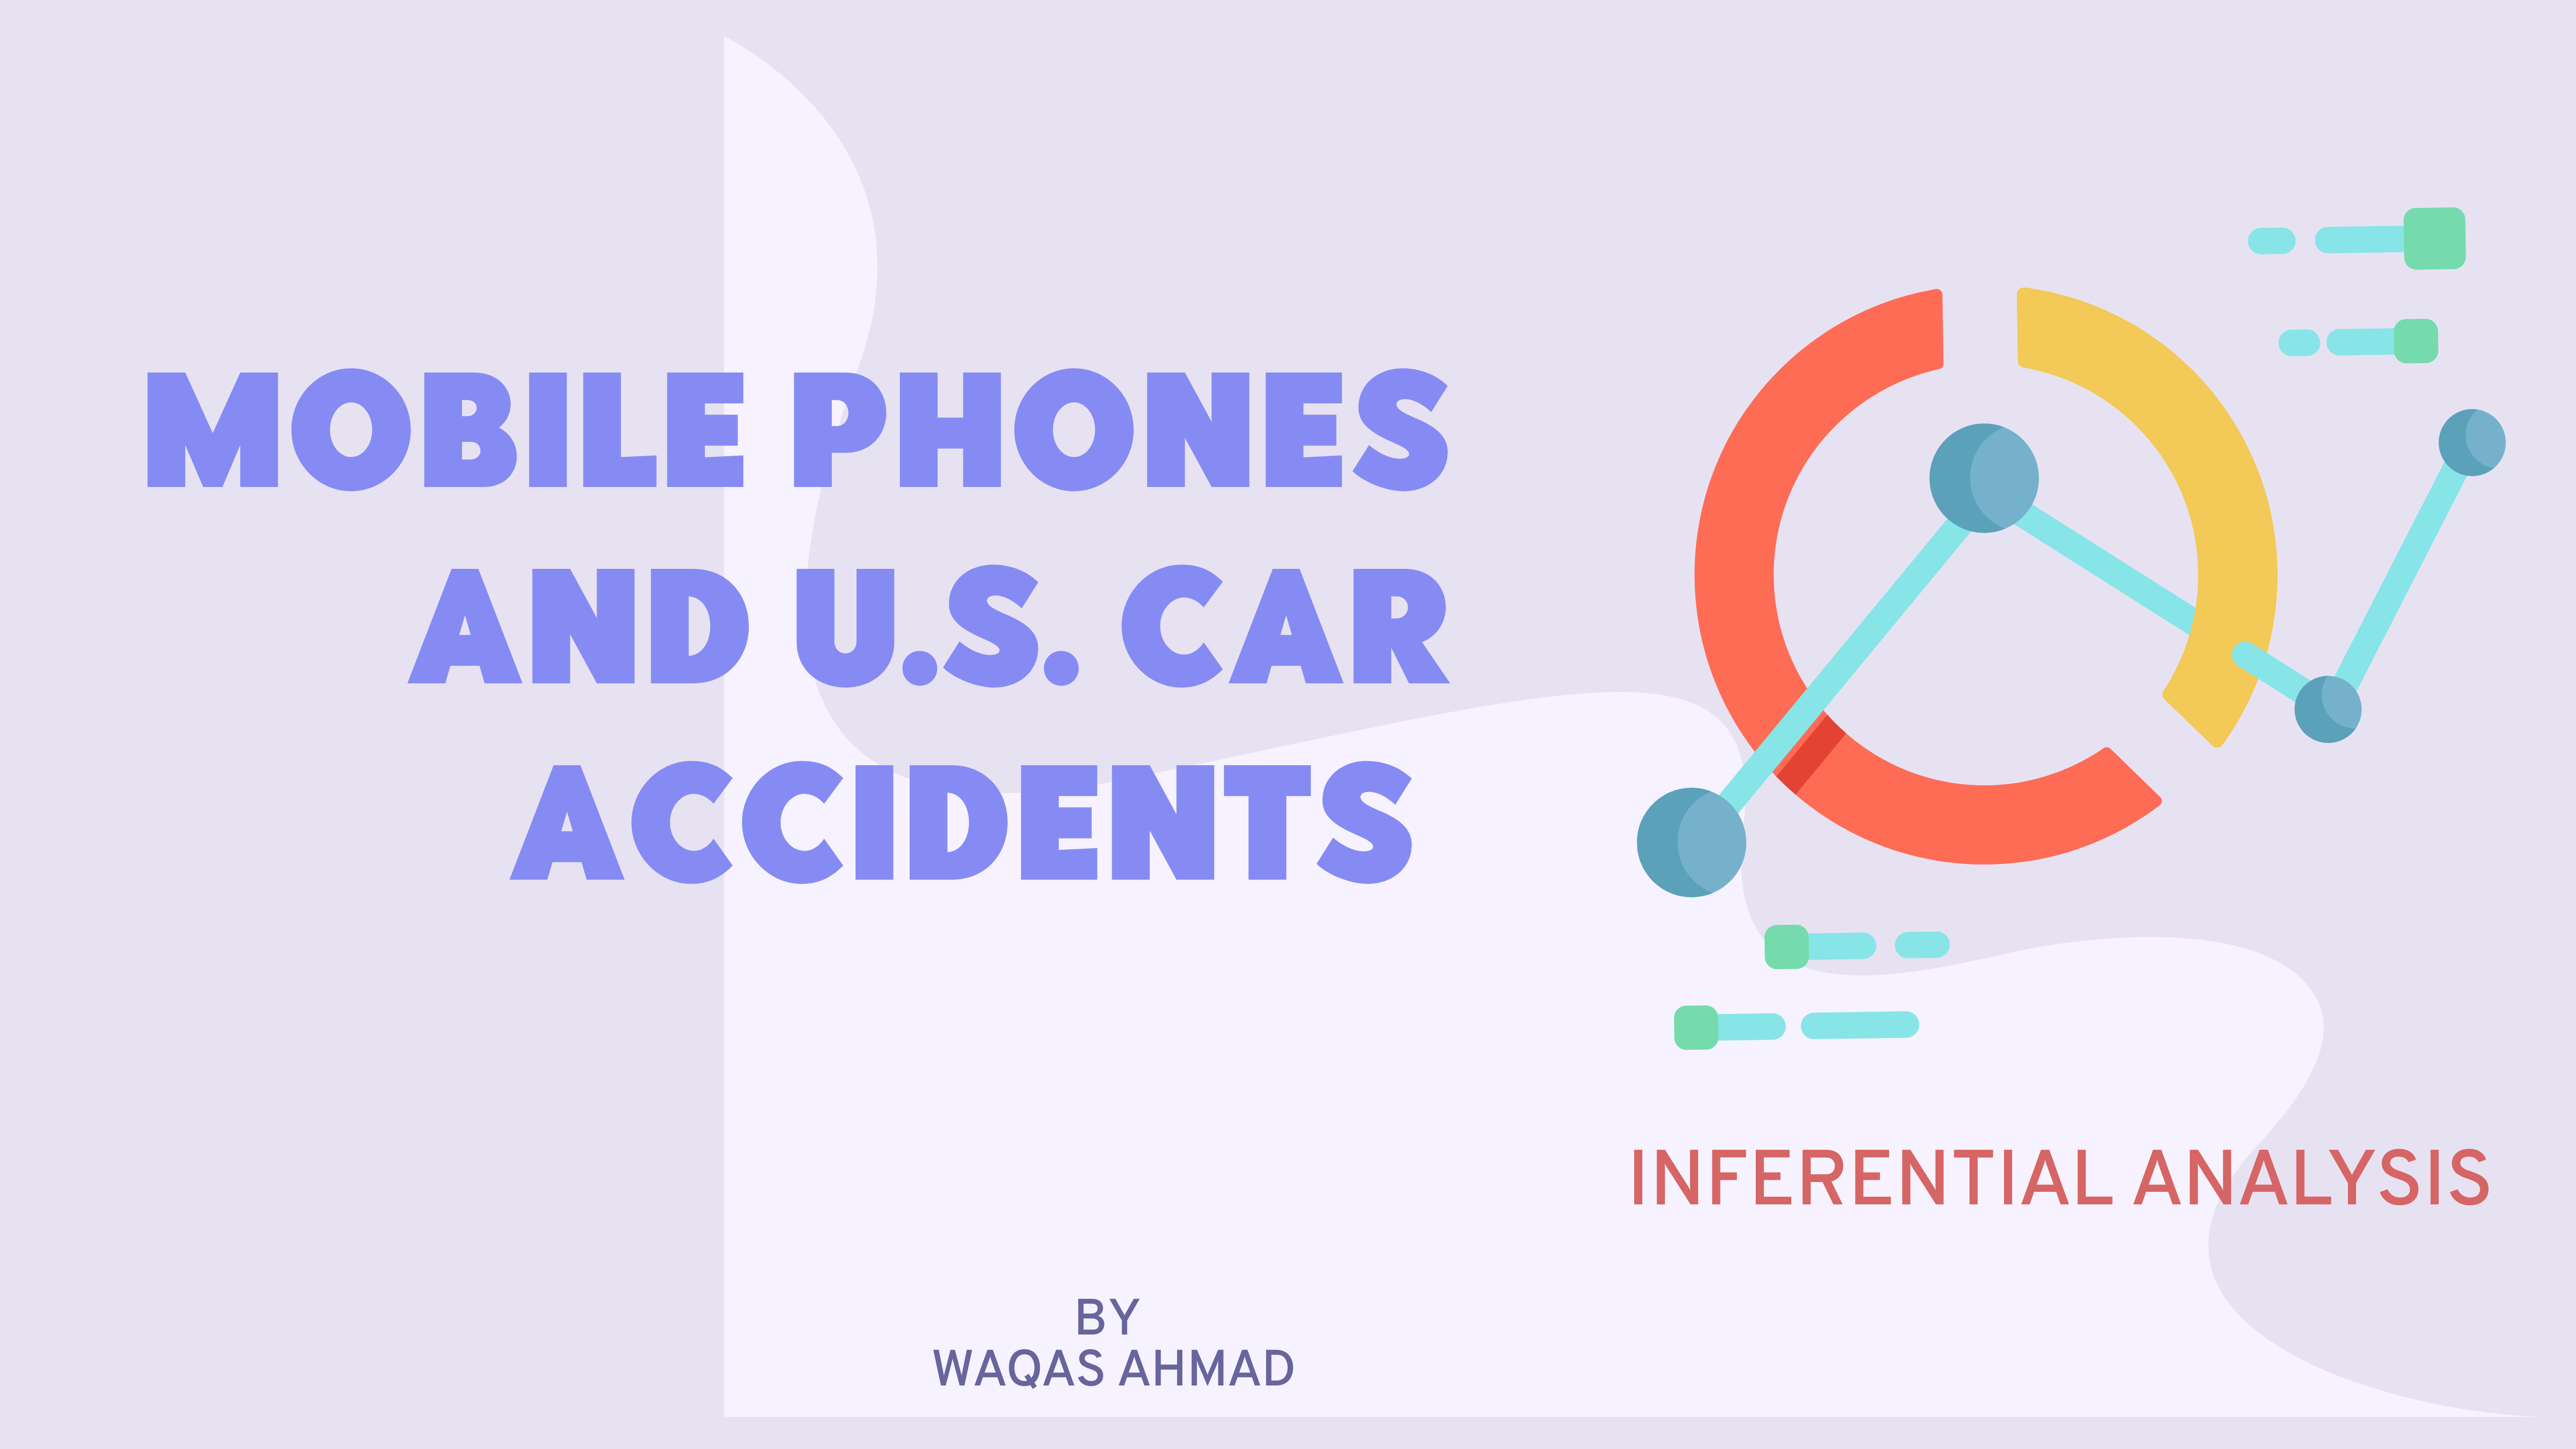

<div style="text-align: center"> <h1> Mobile Phones and U.S. Car Accidents Inferential Analysis</h1></div>
<div style="text-align: right"> <h2><i> An Inference Case Study</i></h2></div>

### Introduction

Modern roads are witnessing a concerning rise in car crashes and traffic snarls. Distraction reigns supreme, with drivers perpetually glued to their smartphones, even during red lights and stop-and-go traffic. Distracted driving's dangers are well-known, yet the trend persists. 

## Goal
Goal of the project is  to infer: ***Did smartphone usage caused a measurable increase in the number of traffic accidents in the U.S.?***

Experimentally proving the link between smartphones and increased accidents is unethical. However, observational data and causal inference methods can offer valuable insights into this critical issue.


#### Data Sources

This analysis uses publicly available data collected by the National Highway Traffic Safety Administration (NHTSA) and the Pew Research Center. 
- NHTSA collects U.S. car accident data monthly. Data categorized as "Fatal," "Injury-causing," or "Property-damaging."
Data source: https://cdan.nhtsa.gov/query.
- Pew Research conducts randomized surveys to assess cellphone and smartphone ownership among American adults. They have been conducting cellphone surveys since 2002, with a specific question about smartphone ownership added in 2011. The data is available at https://www.pewresearch.org/internet/fact-sheet/mobile/.

## [**Stages**](#stages)

- **Stage 1:** [**Importing Data and Liabraries**](#import)
- **Stage 2:** [**Data Preparation**](#process)
- **Stage 3:** [**Plotting the Data**](#plotting)
- **Stage 4:** [**Hypothesis Testing**](#testing)
  - [**ANOVA(Analysis of Variance**)](#anova)
  - [**HSD (Tukey's Honestly Significant Difference) Test**](#hsd)
  - [**Regression Discontinuity (RD) Analysis**](#rda)
- **Stage 5:** [**Conclusion:**](#conclusion)

### Stage 1: **Load Data and Import Liabraries** <a class= "anchor" id = "import"> </a>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline 

In [36]:


crash_data = pd.read_csv("crash_by_month.csv")
phone_data = pd.read_csv("PEW_cellPhoneUsage.csv")

In [37]:
crash_data = pd.read_csv("crash_by_month.csv") # annual crash data from NHTSA
phone_data = pd.read_csv("PEW_CellPhoneUsage.csv") # cellphone usage data from the Pew Research Center

### **Stage 2 - Data Preparation** <a class= "anchor" id = "process"> </a>

#### **Data structure and characteristics**

In [38]:
crash_data.head() # look at the top 5 rows of the crash data to get a feel for the structure of the dataframe

year  January  February  March  April   May  June  July  August  September  \
0  2006     2931      2695   3042   3138  3345  3383  3527    3474       3348   
1  2007     2732      2618   3092   3041  3312  3281  3460    3325       3235   
2  2008     2575      2586   2549   2722  2887  3029  3018    3224       2860   
3  2009     2377      2167   2349   2592  2780  2750  2787    2865       2650   
4  2010     2101      1830   2213   2552  2704  2569  2852    2825       2799   

   October  November  December   Type  Population  
0     3462      3168      3135  Fatal   299398484  
1     3325      3066      2948  Fatal   301621157  
2     3063      2829      2830  Fatal   304059724  
3     2622      2512      2411  Fatal   307006550  
4     2827      2587      2437  Fatal   309327143

In [39]:
crash_data.info() # find out the size of the crash dataframe, types of data, and whether there are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        45 non-null     int64 
 1   January     45 non-null     int64 
 2   February    45 non-null     int64 
 3   March       45 non-null     int64 
 4   April       45 non-null     int64 
 5   May         45 non-null     int64 
 6   June        45 non-null     int64 
 7   July        45 non-null     int64 
 8   August      45 non-null     int64 
 9   September   45 non-null     int64 
 10  October     45 non-null     int64 
 11  November    45 non-null     int64 
 12  December    45 non-null     int64 
 13  Type        45 non-null     object
 14  Population  45 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 5.4+ KB


**Insights - Data Structure**
- The crash data consists of **15 columns** and **45 rows**.
- It is a mixed long/wide dataframe.
- **Year**, **Type (of crash)**, and **Population** are in *long format*.
- The number of crashes per month is in *wide format*, with one column for each month.
- Fortunately, there are *no missing data* to contend with.

**Data Preparation Steps**
1. Convert the data to **fully long format**.
2. Format the **dates** (month and year).
3. Compute the **total number of crashes for each month/year** (sum the number of each crash type: "Fatal," "Injury-causing," and "Property-damaging").
4. **Normalize** the total number of crashes per month/year to the **total population that year**.


In [40]:
phone_data.head() # look at the top 5 rows of the cellphone data to get a feel for the structure of the dataframe

Date  Cellphone  Smartphone
0  10/27/02         62         NaN
1  11/30/04         65         NaN
2    2/9/05         66         NaN
3  12/31/05         67         NaN
4   3/28/06         66         NaN

In [41]:
phone_data.info() # find out the size of the cellphone dataframe, types of data, and whether there are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        64 non-null     object 
 1   Cellphone   64 non-null     int64  
 2   Smartphone  29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


**Insights - Cellphone Data**
- The cellphone data consists of **3 columns** and **64 rows**.
- The `Date` column will need to be converted to the date data type.
- The `Cellphone` and `Smartphone` columns represent percentages of the adult American population and do not require adjustments.
- Notably, there are several missing data points in the `Smartphone` column.

### Crash Data Formatting Tasks

- Pivot from a wide data frame to a long data frame.
- Format the date column.
- Sum the different types of crashes for each month.
- Normalize the number of crashes to the population.
- Add a column designating the season of the year.

**Data Conversion**
First up, the dataframe will be converted to a fully long format.


In [42]:
long_crash_data = pd.melt(crash_data, id_vars=['year', 'Population', 'Type']) # pivot the dataframe from wide to long
long_crash_data.rename(columns={ "variable" : "Month"}, inplace = True) # change the name of the column with months to be "Month"
long_crash_data.head()

year  Population   Type    Month  value
0  2006   299398484  Fatal  January   2931
1  2007   301621157  Fatal  January   2732
2  2008   304059724  Fatal  January   2575
3  2009   307006550  Fatal  January   2377
4  2010   309327143  Fatal  January   2101

*Finally, crash data is in a fully long format.*

Next, the **date column** will be formatted:

In [43]:
long_crash_data["Month_Year"] = long_crash_data["Month"] + long_crash_data["year"].astype(str) # concatenate month and year into one column

long_crash_data["Date"] = pd.to_datetime(long_crash_data['Month_Year']) # convert month and year to date format

long_crash_data.drop(columns = ["year", "Month_Year"], inplace = True) # clean-up old columns

print(long_crash_data.head())
print(long_crash_data.info())

   Population   Type    Month  value       Date
0   299398484  Fatal  January   2931 2006-01-01
1   301621157  Fatal  January   2732 2007-01-01
2   304059724  Fatal  January   2575 2008-01-01
3   307006550  Fatal  January   2377 2009-01-01
4   309327143  Fatal  January   2101 2010-01-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Population  540 non-null    int64         
 1   Type        540 non-null    object        
 2   Month       540 non-null    object        
 3   value       540 non-null    int64         
 4   Date        540 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 21.2+ KB
None


*Eventually, we have`Date` column that includes the month and year and its data type `datetime64`*

Next, the **total number of crashes** (including all three types) will be computed for each month:

In [44]:
summed_crash_data = long_crash_data.groupby(['Date', 'Population', 'Month'], as_index = False)["value"].sum() # sum the different types of crashes for each date

summed_crash_data.head()

Date  Population     Month   value
0 2006-01-01   299398484   January  506512
1 2006-02-01   299398484  February  461160
2 2006-03-01   299398484     March  478828
3 2006-04-01   299398484     April  466287
4 2006-05-01   299398484       May  503526

*There is no longer a `Type` column and the `value` (number of crashes) was summed for all three types of crashes for each date*

Next, the **no of crashes will be normalized to population size** (per 100,000 people):

In [45]:
summed_crash_data["Pop_100k"] = summed_crash_data["Population"] / 100000 # get the population as number of 100s of thousands 
summed_crash_data["Crashes_per_100k"] = summed_crash_data["value"] / summed_crash_data["Pop_100k"] # normalize the crash counts to per 100 thousand people


summed_crash_data.drop(columns = ["Population", "value", "Pop_100k"], inplace = True) # clean-up old columns

summed_crash_data.head()

Date     Month  Crashes_per_100k
0 2006-01-01   January        169.176541
1 2006-02-01  February        154.028836
2 2006-03-01     March        159.930002
3 2006-04-01     April        155.741270
4 2006-05-01       May        168.179208

Finally, another column, **`Season` will be added based on the `Month` column**. *By adding this column it will be possible to test whether more crashes occur in certain seasons.*

In [46]:
# create a dictionary designating each month to one season
season_dict = {
    'December' : 'Winter',
    "January" :"Winter",
    "February" :"Winter",
    "March" :"Spring",
    "April": "Spring",
    "May" :"Spring",
    "June": "Summer",
    "July": "Summer",
    "August" :"Summer",
    "September" :"Fall",
    "October": "Fall",
    "November" :"Fall"
}

summed_crash_data["Season"] = summed_crash_data['Month'].map(season_dict) # create new column 'Season' based on the month
summed_crash_data.drop(columns = ["Month"], inplace = True) # clean-up old columns

print(summed_crash_data.head())
print(summed_crash_data.info())

        Date  Crashes_per_100k  Season
0 2006-01-01        169.176541  Winter
1 2006-02-01        154.028836  Winter
2 2006-03-01        159.930002  Spring
3 2006-04-01        155.741270  Spring
4 2006-05-01        168.179208  Spring
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB
None


- The formatted crash dataframe has 3 columns and 180 rows. 
- `Crashes_per_100k` has the total number of car crashes (regardless of type) for each month of every year from 2006 to 2020 normalized to population.

#### Smartphone data

The smartphone data requires considerably less formatting. The main task is to format the date column as `datetime64`: 

In [47]:
phone_data['Date'] = pd.to_datetime(phone_data['Date'])

In [48]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        64 non-null     datetime64[ns]
 1   Cellphone   64 non-null     int64         
 2   Smartphone  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.6 KB


*The formatted cellphone data still has 3 columns and 64 rows. Additionally, there is still missing data in the `Smartphone` column.*

=> <a href ="#stages">Scrollbak to Top </a>

### **Stage 3 - Plotting the Data** <a class= "anchor" id = "plotting"> </a>

### Plotting the data

#### Crash Data

A scatter plot of the normalized crash data over time will reveal any outliers that need to be considered and will show general trends in the number of car crashes over time.

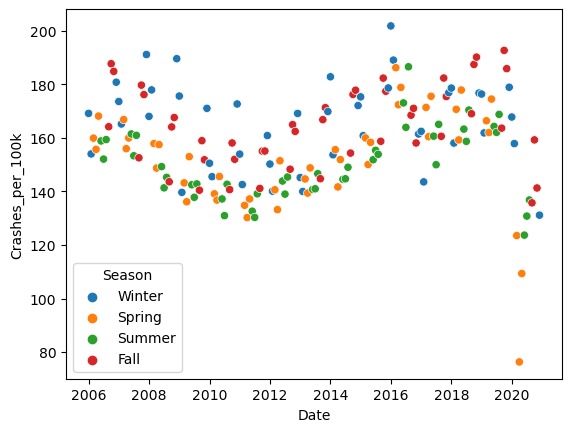

In [49]:
import seaborn as sns

sns.scatterplot(x='Date', y='Crashes_per_100k', hue='Season', data=summed_crash_data)
plt.show();


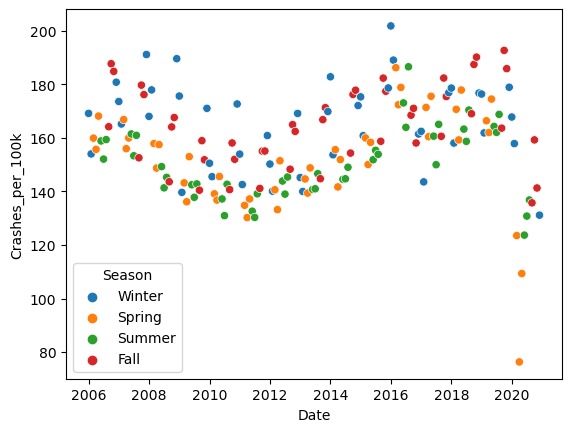

In [50]:
plt.figure()
sns.scatterplot(x = 'Date', y = 'Crashes_per_100k', hue = "Season",
                data = summed_crash_data)
plt.show()

**Insights**

**Impact of COVID-19 on Car Crashes**
The plot reveals a sharp decline in the number of car crashes in 2020. This significant reduction can be attributed to the onset of the COVID-19 pandemic, which began affecting the United States in February/March 2020. It had a substantial impact on the number of people driving and crashing.

**Outlier Removal**
Given that the year 2020 is an outlier due to the pandemic's unique circumstances, it will be excluded from future data analysis.


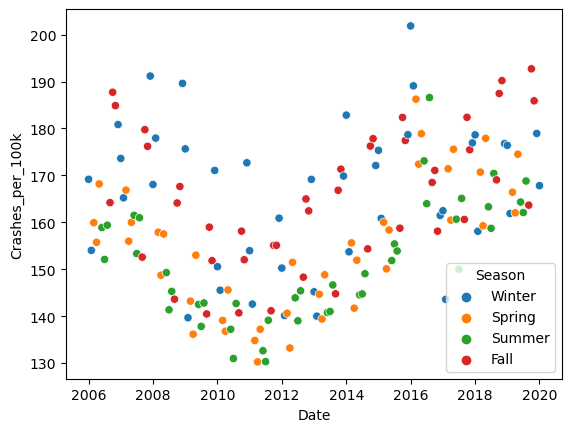

In [51]:
summed_crash_data = summed_crash_data[(summed_crash_data['Date'] <= '2020-1-01')] # filter dates after January 2020

plt.figure()
sns.scatterplot(x = 'Date', y = 'Crashes_per_100k', hue = "Season", 
                data = summed_crash_data)
plt.show()

**Crash Rate Trends**
Once the outlier year is removed, a clearer trend in the crash rate emerges. 
- The number of crashes per 100,000 people shows a steady decline from 2006 until around 2011
- At 2011 trend shifts, and the no of crashes per 100,000 people begins to steadily increase. ***This trend reversal is significant***

**Seasonal Effect**
Additionally, there appears to be a seasonal effect, with more crashes occurring during the Fall and Winter compared to the Spring and Summer. However, it's important to note that the overall trend of decreasing crash rates before 2011 and increasing crash rates after 2011 appears to hold true for all four seasons.

In [52]:
summed_crash_data.to_csv("crash_by_month_cleaned.csv", index = False)

## Smartphone Data

While the cellphone dataset contains information about both total cellphone and smartphone usage, the *primary goal of this analysis is to ascertain whether smartphone usage, specifically, played a role in the increase of car accidents in the United States*

**Smartphone Data - Scatterplot Visualization**
To examine the overall trend in smartphone usage over time, a scatterplot will be generated.


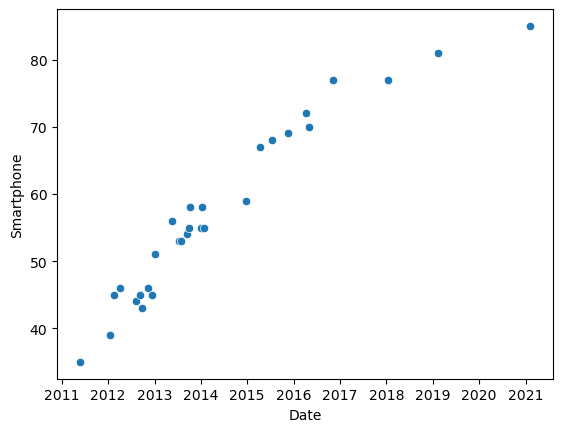

In [53]:
plt.figure()
sns.scatterplot(x = 'Date', y = 'Smartphone', data = phone_data)
plt.show()

#### **Insights**
- **Smartphone Usage Trends**
  - The percentage of American adults reporting smartphone usage exhibited a steady increase from 2011, the year when smartphone usage data was first recorded.
  - This growth continued until around 2017 when the rate of increase appeared to slow down.
  - Notably, the data and plot do not precisely capture when smartphone usage initially surged. The first iPhone was released in 2007, but it took some time to gain popularity. Similarly, the first Android smartphone was introduced in 2008 and experienced a delay before widespread adoption.

- **Key Cutpoint**
  - For the ensuing causal inference analysis, **2011** will be used as the cutpoint.
  - This choice is pivotal as it marks the recognition of the significance of smartphone usage and its subsequent impact.
  - No further export for analysis in R is required, as this serves as the key insight derived from the dataset.


## Time Series Plot of Crash Rates:
Visualize the trend in crash rates over time, including seasonal patterns. You can create a time series plot to show how crash rates vary across different years and seasons.

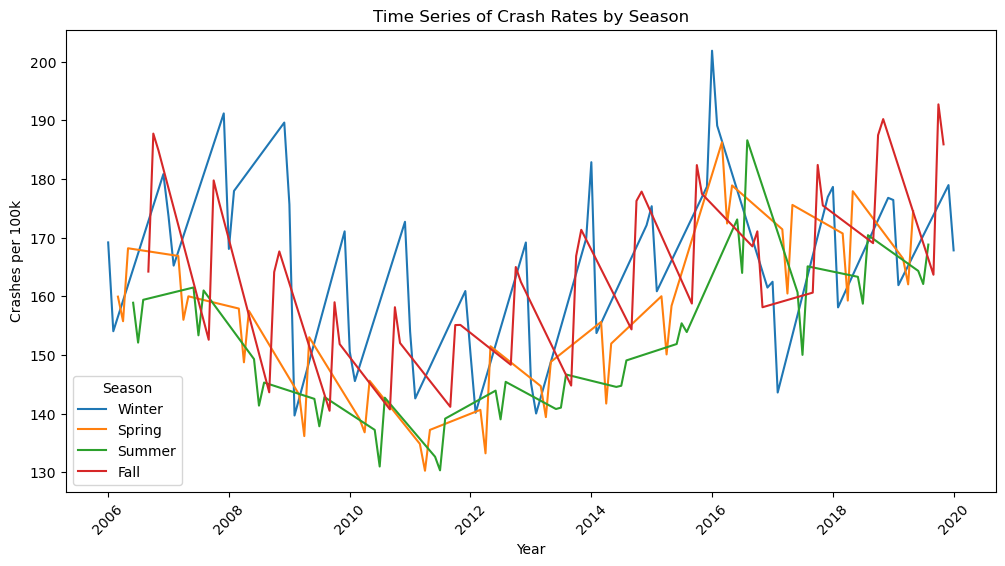

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot with separate lines for each season
sns.lineplot(x='Date', y='Crashes_per_100k', hue='Season', data=summed_crash_data)

# Set the title, labels, and rotate x-axis labels for better readability
plt.title('Time Series of Crash Rates by Season')
plt.xlabel('Year')
plt.ylabel('Crashes per 100k')
plt.xticks(rotation=45)

# Add a legend to distinguish between seasons
plt.legend(title='Season')

# Show the plot
plt.show()

Visually Trend reversal can be observed at 2011, but its not conclusive that the reason is smartphone

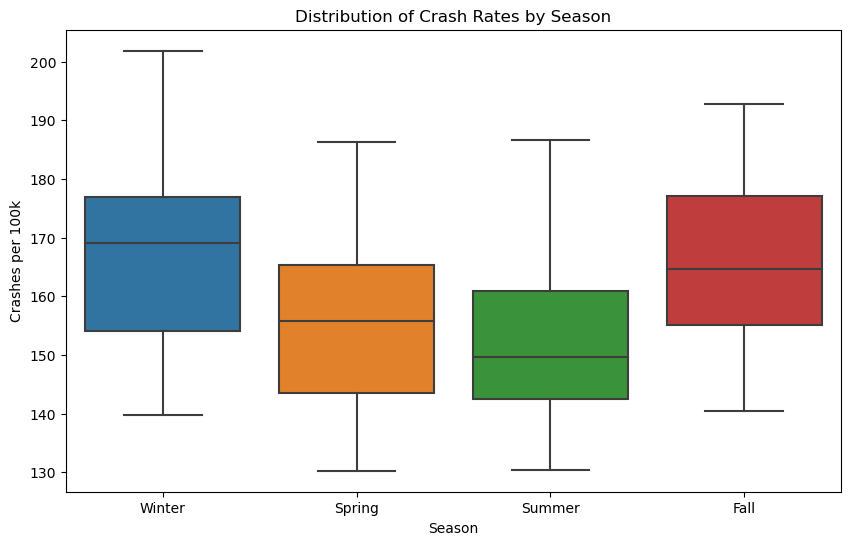

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Crashes_per_100k', data=summed_crash_data)
plt.title('Distribution of Crash Rates by Season')
plt.xlabel('Season')
plt.ylabel('Crashes per 100k')
plt.show()


**Insights**
- *There seems to be a seasonal effect, with more crashes occurring during the Fall and Winter compared to the Spring and Summer.* 
- However, it's important to note that the overall trend of decreasing crash rates before 2011 and increasing crash rates after 2011 appears to hold true for all four seasons

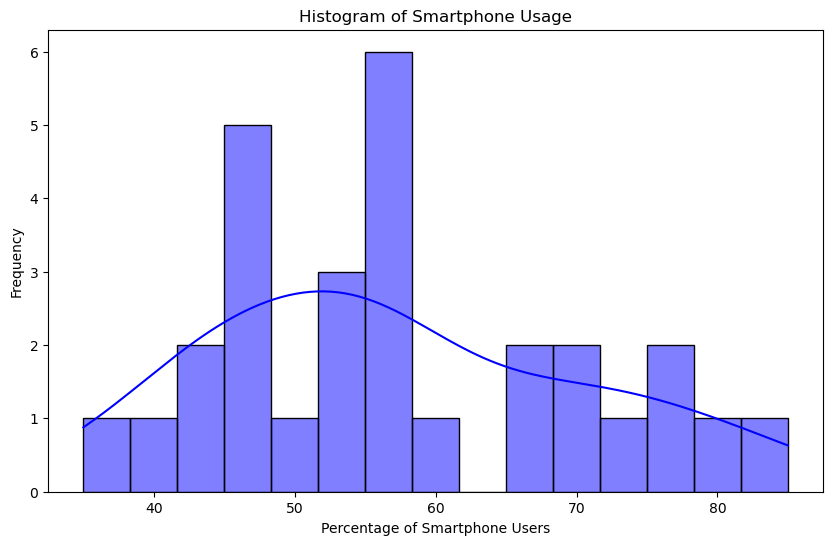

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(phone_data['Smartphone'], bins=15, kde=True, color='blue')
plt.title('Histogram of Smartphone Usage')
plt.xlabel('Percentage of Smartphone Users')
plt.ylabel('Frequency')
plt.show()


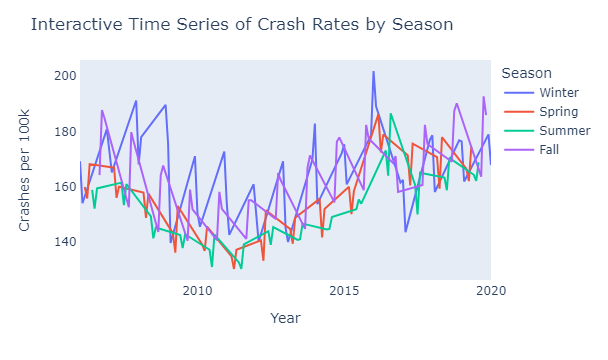

In [57]:
import plotly.express as px

fig = px.line(summed_crash_data, x='Date', y='Crashes_per_100k', color='Season', labels={'Crashes_per_100k': 'Crashes per 100k'})
fig.update_layout(title='Interactive Time Series of Crash Rates by Season',
                  xaxis_title='Year', yaxis_title='Crashes per 100k',
                  xaxis=dict(showline=True, showgrid=False),
                  yaxis=dict(showline=True, showgrid=False))
fig.show()


*There seems to be verall trend decrease in crashes bedore 2011 and increase in crash rates after 2011*

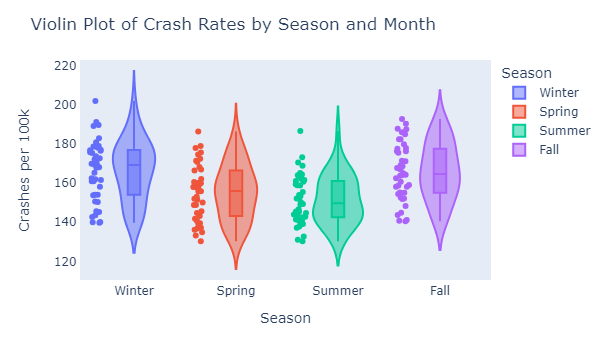

In [58]:
import plotly.express as px

fig = px.violin(summed_crash_data, x='Season', y='Crashes_per_100k', color='Season',
                labels={'Crashes_per_100k': 'Crashes per 100k'}, box=True, points='all')
fig.update_layout(title='Violin Plot of Crash Rates by Season and Month',
                  xaxis_title='Season', yaxis_title='Crashes per 100k',
                  xaxis=dict(showline=True, showgrid=False),
                  yaxis=dict(showline=True, showgrid=False))
fig.show()


*Seasonal effect can be observed - increased car crashes in fall & winter*

=> <a href ="#stages">Scrollback to Top </a>

## Stage 4: Hypothesis Testing <a class= "anchor" id = "testing"> </a>

**Crash Data Analysis**
The scatter plot of the crash data revealed a potential trend: it appeared that there were more crashes in the fall and winter compared to the spring and summer, irrespective of the year.

**Hypothesis Testing**
To investigate this trend further, a hypothesis can be tested using a oneway ANOVA (analysis of variance) to investigate whether this observed trend is statistically significant, a hypothesis test is conducted.


### **ANOVA (Analysis of variance)** <a class= "anchor" id = "anova"> </a>

**`Null hypothesis`** The null hypothesis, in this case, is that the season has no impact on crash rates.

In [59]:
from scipy.stats import f_oneway # import function for oneway ANOVA

In [60]:
#subset the crash rates by season
winter = summed_crash_data[summed_crash_data['Season']== 'Winter']['Crashes_per_100k']
spring = summed_crash_data[summed_crash_data['Season']== 'Spring']['Crashes_per_100k']
summer = summed_crash_data[summed_crash_data['Season']== 'Summer']['Crashes_per_100k']
fall = summed_crash_data[summed_crash_data['Season']== 'Fall']['Crashes_per_100k']

In [61]:
anova_result = f_oneway(winter,spring,summer,fall) #perform the oneway analysis of variance on crash rate based on season
print(anova_result)

F_onewayResult(statistic=11.931927554935433, pvalue=4.119913700411912e-07)


##### **Interpretation**

 - The F-statistic of 11.93 suggests that there is some variation in crash rates between the seasons.
 - The p-value of 4.12e-07 is extremely low, significantly below the commonly used significance level of 0.05. *This low p-value indicates that the observed differences in crash rates across seasons are highly unlikely to have occurred by random chance alone.*

##### **Conclusion of ANOVA**
Based on the ANOVA results, it can be concluded that there are statistically significant differences in crash rates among the seasons.
This means that the ***season has a significant impact on crash rates, confirming the initial hypothesis***

*But since the ANOVA results were statistically significant, it is appropriate to apply an ad hoc test, such as Tukey's honestly significant difference (HSD) test that can determine which seasons have statistically significant crash rates from eachother*

### **Tukey's honestly significant difference (HSD) test** <a class= "anchor" id = "hsd"> </a>

**`Null hypothesis`** The null hypothesis, in this case, is that the season has no impact on crash rates.

Tukey's honestly significant difference (HSD) test are typically used to identify which specific pairs of seasons have significantly different crash rates.

Test compares crash rates between different pairs of seasons (e.g., Fall vs. Spring, Fall vs. Summer, etc.)

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd #import the function for a pairwise Tukey HSD test

In [63]:
tukeyHSD_results = pairwise_tukeyhsd(endog=summed_crash_data['Crashes_per_100k'], #perform the pairwise Tukey HSD test
                          groups=summed_crash_data['Season'],
                          alpha=0.05) # the p-value cut-off for statistical significance is defined as 0.05
print(tukeyHSD_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Fall Spring -10.6271 0.0041 -18.6573 -2.5969   True
  Fall Summer -14.3698    0.0    -22.4 -6.3396   True
  Fall Winter   0.5477  0.998  -7.4357  8.5311  False
Spring Summer  -3.7427 0.6216 -11.7729  4.2875  False
Spring Winter  11.1748 0.0021   3.1914 19.1581   True
Summer Winter  14.9175    0.0   6.9341 22.9008   True
-----------------------------------------------------


If **True**, it means the difference is statistically significant; if **False**, it means the difference is not statistically significant.

**Tukey's Honestly Significant Difference (HSD) Test Result**

The pairwise Tukey's HSD test was performed to identify specific pairs of seasons that have statistically significant differences in crash rates. The results are as follows:

- **Fall vs. Spring:**
  - Meandiff: -10.63
  - p-adj: 0.0041
  - Reject: True
  - Interpretation: The crash rates in Fall and Spring are statistically significantly different. Fall has a lower crash rate compared to Spring.

- **Fall vs. Summer:**
  - Meandiff: -14.37
  - p-adj: 0.0
  - Reject: True
  - Interpretation: The crash rates in Fall and Summer are statistically significantly different. Fall has a lower crash rate compared to Summer.

- **Fall vs. Winter:**
  - Meandiff: 0.55
  - p-adj: 0.998
  - Reject: False
  - Interpretation: There is no statistically significant difference in crash rates between Fall and Winter.

- **Spring vs. Summer:**
  - Meandiff: -3.74
  - p-adj: 0.6216
  - Reject: False
  - Interpretation: There is no statistically significant difference in crash rates between Spring and Summer.

- **Spring vs. Winter:**
  - Meandiff: 11.17
  - p-adj: 0.0021
  - Reject: True
  - Interpretation: The crash rates in Spring and Winter are statistically significantly different. Spring has a higher crash rate compared to Winter.

- **Summer vs. Winter:**
  - Meandiff: 14.92
  - p-adj: 0.0
  - Reject: True
  - Interpretation: The crash rates in Summer and Winter are statistically significantly different. Summer has a higher crash rate compared to Winter.

Here, the null hypothesis is that there is no difference in crash rate between the two seasons being compared. Based on the results, this null hypothesis can be rejected for Fall/Spring, Fall/Summer, Spring/Winter, and Summer/Winter. To sum up, the crash rate in Fall and Winter is significantly different than in Spring and Summer.

### Next steps

In the ensuing analysis, regression discontinuity (RD) analysis will be used to determine whether the crash rate before and after the key year of 2011 changed in a significant way that would indicate smartphone useage **caused** an increase in car accidents.

### **Regression Discontinuity (RD) Analysis** <a class= "anchor" id = "rda"> </a>

Analysis aims to assess whether there was a significant change in the crash rate before and after the key year of 2011, potentially indicating a relationship between smartphone usage and an increase in car accidents

In [64]:
summed_crash_data['Treatment'] = (summed_crash_data['Date'].dt.year >= 2011).astype(int)

In [65]:
import statsmodels.api as sm

X = sm.add_constant(summed_crash_data['Treatment'])  # Add a constant for the intercept
Y = summed_crash_data['Crashes_per_100k']

model = sm.OLS(Y, X).fit()


In [66]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Crashes_per_100k   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.035
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.156
Time:                        22:46:50   Log-Likelihood:                -701.49
No. Observations:                 169   AIC:                             1407.
Df Residuals:                     167   BIC:                             1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4760      1.995     78.935      0.0

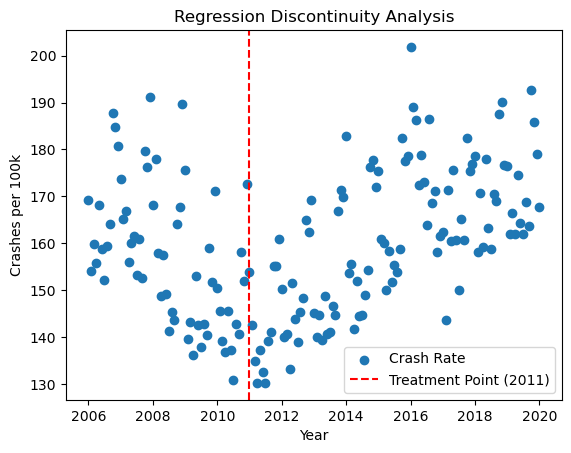

In [67]:
import matplotlib.pyplot as plt
import datetime as dt

# Convert the treatment date to a datetime object
treatment_date = dt.datetime(2011, 1, 1)

plt.scatter(summed_crash_data['Date'], summed_crash_data['Crashes_per_100k'], label='Crash Rate')
plt.axvline(x=treatment_date, color='red', linestyle='--', label='Treatment Point (2011)')
plt.xlabel('Year')
plt.ylabel('Crashes per 100k')
plt.legend()
plt.title('Regression Discontinuity Analysis')
plt.show()


Lets add a smoother line plot, gridlines, and clear annotations for the treatment point to improve visualization and interpretation.

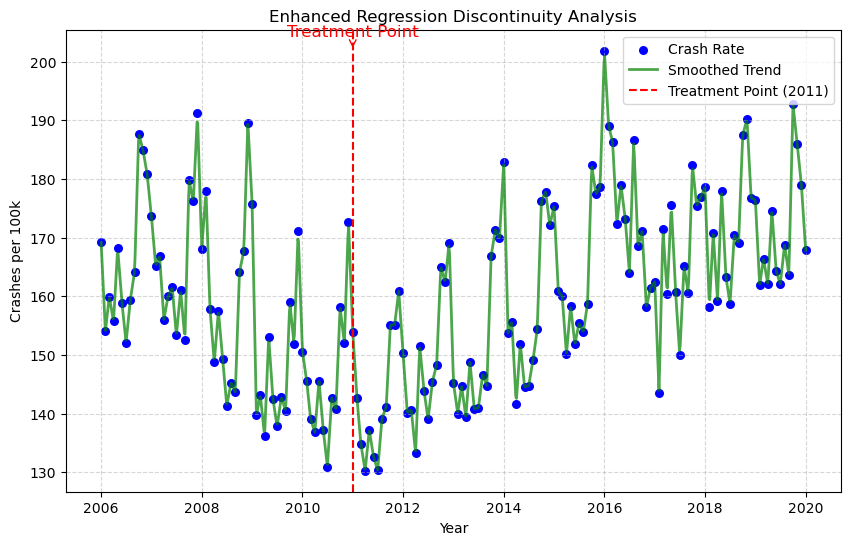

In [68]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# Convert the treatment date to a datetime object
treatment_date = dt.datetime(2011, 1, 1)

# Data
x = summed_crash_data['Date']
y = summed_crash_data['Crashes_per_100k']

# Convert date values to numerical values
x_numeric = x.astype(np.int64) // 10**9  # Convert to seconds since epoch (Unix timestamp)
smoothed_x = np.linspace(min(x_numeric), max(x_numeric), 1000)  # Create a range of numerical dates for smoother line

# Interpolate values for smoother line
smoothed_y = np.interp(smoothed_x, x_numeric, y)

# Convert smoothed_x back to datetime for plotting
smoothed_x_datetime = [dt.datetime.utcfromtimestamp(ts) for ts in smoothed_x]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Crash Rate', marker='o', s=30, color='blue')
plt.plot(smoothed_x_datetime, smoothed_y, linestyle='-', color='green', linewidth=2, alpha=0.7, label='Smoothed Trend')
plt.axvline(x=treatment_date, color='red', linestyle='--', label='Treatment Point (2011)')

# Add annotations
plt.annotate('Treatment Point', (treatment_date, max(y)), textcoords="offset points", xytext=(0, 10),
             ha='center', fontsize=12, color='red', arrowprops=dict(arrowstyle="->", color='red'))

plt.xlabel('Year')
plt.ylabel('Crashes per 100k')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Enhanced Regression Discontinuity Analysis')
plt.show()


## Counterfactual Density Plot
This type of plot is useful for visualizing the counterfactual distribution of outcomes had there been no treatment (i.e., no introduction of smartphones in 2011). It helps to understand the potential impact of the treatment on the outcome.

To create a Counterfactual Density Plot, we'll:

- Estimate the counterfactual distribution for the years before 2011.
- Estimate the treatment effect (the difference between the observed outcome and the counterfactual) for each year.
- Visualize the distribution of these treatment effects.

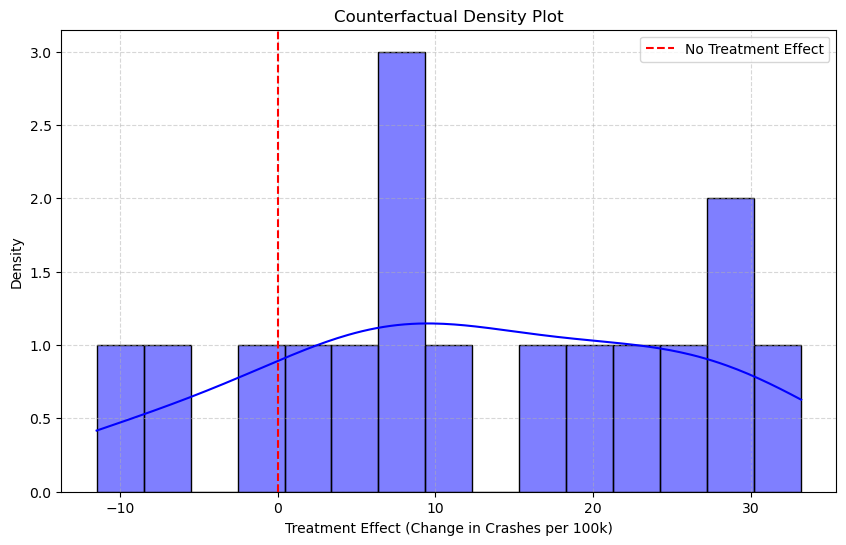

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Convert the treatment date to a datetime object
treatment_date = dt.datetime(2011, 1, 1)

# Data
x = summed_crash_data['Date']
y = summed_crash_data['Crashes_per_100k']

# Convert date values to numerical values
x_numeric = x.astype(np.int64) // 10**9  # Convert to seconds since epoch (Unix timestamp)

# Calculate the treatment effect (difference between observed and counterfactual) for each year
treatment_effects = []
for year in range(2001, 2022):  # Assuming data from 2001 to 2021
    if year < 2011:
        pre_treatment_y = y[x_numeric < treatment_date.timestamp()]
        counterfactual_y = pre_treatment_y.mean() if len(pre_treatment_y) > 0 else 0
    else:
        pre_treatment_y = y[(x_numeric >= treatment_date.timestamp()) & (x_numeric < treatment_date.timestamp() + 365*24*3600)]
        counterfactual_y = pre_treatment_y.mean() if len(pre_treatment_y) > 0 else 0
    observed_y = y[(x_numeric >= treatment_date.timestamp() + (year - 2011) * 365*24*3600) & (x_numeric < treatment_date.timestamp() + (year - 2010) * 365*24*3600)]
    treatment_effect = observed_y.mean() - counterfactual_y
    treatment_effects.append(treatment_effect)

# Create a Counterfactual Density Plot
plt.figure(figsize=(10, 6))
sns.histplot(treatment_effects, kde=True, color='blue', bins=15)
plt.axvline(x=0, color='red', linestyle='--', label='No Treatment Effect')
plt.xlabel('Treatment Effect (Change in Crashes per 100k)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Counterfactual Density Plot')
plt.show()


In this plot, we estimate the treatment effect for each year and create a histogram with a KDE (Kernel Density Estimation) to visualize the distribution of treatment effects. The red dashed line represents zero treatment effect. This plot helps us understand the potential impact of smartphone introduction in 2011 on crash rates.

In [70]:
print("Columns in crash_data:", crash_data.columns)
print("Columns in phone_data:", phone_data.columns)


Columns in crash_data: Index(['year', 'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Type',
       'Population'],
      dtype='object')
Columns in phone_data: Index(['Date', 'Cellphone', 'Smartphone'], dtype='object')


=> <a href ="#stages">Scrollback to Top </a>

### **Interpretation of Regression Discontinuity (RD) Analysis**

The regression discontinuity (RD) analysis performed aims to assess whether there was a significant change in the crash rate before and after the key year of 2011, potentially indicating a relationship between smartphone usage and an increase in car accidents. Here's an interpretation of the results:

#### **1. Regression Results:**
- The dependent variable in the regression analysis is the "Crashes_per_100k," which represents the number of crashes per 100,000 people.
- The model includes a binary treatment variable "Treatment" that takes the value 1 for years from 2011 and onwards and 0 for years before 2011.
- The constant term (intercept) in the model is approximately 157.4760, representing the expected crash rate in the years before 2011.
- The coefficient for the "Treatment" variable is approximately 3.5439, which represents the change in the crash rate associated with the introduction of smartphones in 2011.

#### **2. R-squared and F-statistic:**
- The R-squared value of 0.012 suggests that the model explains only a small proportion of the variance in the crash rate. This indicates that the "Treatment" variable alone does not explain much of the variation in crash rates.
- The F-statistic tests whether the "Treatment" variable significantly affects the crash rate. In this case, the F-statistic is 2.035, and the associated p-value is 0.156, which is greater than the conventional significance level of 0.05. This suggests that the introduction of smartphones in 2011 does not have a statistically significant impact on the crash rate.

#### **3. Interpretation:**
- Based on the regression analysis, there is no strong evidence to support the hypothesis that the introduction of smartphones in 2011 led to a significant increase in car accidents. The p-value for the "Treatment" variable is not statistically significant, indicating that the change in the crash rate is not significantly associated with the treatment year (2011).
- The low R-squared value suggests that other factors not included in the model may be influencing crash rates, and the introduction of smartphones alone does not explain much of the variation.

#### **4. RD Plot:**
- The RD plot displays the crash rate over time with a vertical red dashed line at 2011, indicating the treatment point. There is no visually apparent discontinuity or significant change in the crash rate around 2011 in the plot, further supporting the regression results.

In summary, while the RD analysis does not find strong evidence of a significant increase in car accidents associated with the introduction of smartphones in 2011, it's essential to consider that other factors may contribute to changes in crash rates. Further research, including the consideration of additional variables and a larger dataset, may be necessary to fully understand the relationship between smartphone usage and car accidents.


## **Stage 5: Conclusion & Insights** <a class= "anchor" id = "conclusion"> </a>

#### **Conclusion:**

The analysis of car accident rates in relation to the widespread adoption of smartphones aimed to shed light on whether smartphones have had a significant impact on road safety. The project spanned several stages, including data collection, visualization, hypothesis testing, and regression discontinuity analysis. Here are the key conclusions and insights drawn from this comprehensive analysis:

1. **Visual Trends:** There's a clear visual shift in accident rates around 2011, but it's inconclusive about smartphone influence due to other factors.

2. **Seasonal Patterns:** Seasonal analysis shows higher accidents in Fall and Winter, consistent throughout the years, with factors like weather playing a significant role.

3. **Statistical Testing:** ANOVA confirms the seasonal effect, and Tukey's HSD test identifies specific season pairs with significantly different crash rates.

4. **Regression Discontinuity:** The introduction of smartphones in 2011 doesn't have a statistically significant effect on accident rates, indicating the presence of other influential variables.

5. **Counterfactual Assessment:** The counterfactual density plot suggests minimal treatment effect, supporting the conclusion that smartphones had no substantial impact.

#### **Insights:**

1. **Seasonal Influence:** Seasonal factors significantly affect accident rates, particularly in Fall and Winter.

2. **Complex Factors:** The analysis highlights the role of multifaceted elements beyond smartphones, such as weather and societal factors.

3. **Comprehensive Approach:** Understanding the smartphone-accident relationship requires considering multiple variables and a broader dataset.

4. **Continued Monitoring:** Given the dynamic nature of smartphone technology, ongoing monitoring and research are essential to grasp its evolving impact on road safety.

In summary, the analysis indicates that while seasonal factors play a significant role in accident rates, the introduction of smartphones in 2011 is not the sole driver of the observed trend. A comprehensive approach that considers various contributing factors is essential to understanding and improving road safety. Further research and data analysis will be instrumental in unraveling the complex relationship between smartphone usage and car accidents.


---

=> <a href ="#stages">Scrollback to Top </a>

---